# [Exercise 1](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Exercises/E01_gradient_descent.ipynb)

In [37]:
import numpy
import matplotlib.pyplot as pyplot

## 0

In [62]:
numpy.random.seed(42)
SAMPLES = 1000

features = numpy.random.rand(SAMPLES, 2)
noise = numpy.random.randn(1, SAMPLES)
y_vector =  3 * features[:,0] + 5 * features[:,1] + 3 + noise # Random from normal distribution
y_vector = y_vector.reshape(y_vector.size, -1)
X_matrix = numpy.c_[numpy.ones(SAMPLES), features]

## 1

$$C = \frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2 = \frac{1}{m} \sum_{i=1}^m (y_i - \vec{\theta}\cdot \vec{x}_i)^2$$
$$\vec{\theta}_{j+1} = \vec{\theta}_j - \eta\nabla_{\vec{\theta}} C(\vec{\theta})$$
$$\nabla_{\vec\theta} C(\vec{\theta}) = \ldots = \frac{2}{m}X^T(X\vec{\theta}-\vec{y})$$
step rule $\nabla_{\vec\theta} C(\vec{\theta})$ for the function $C$

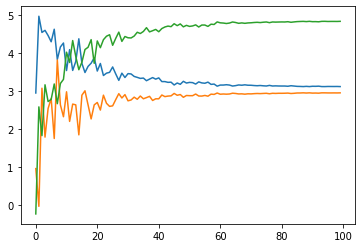

In [63]:
def gradient_decent(
    X_matrix: numpy.ndarray,
    y_vector: numpy.ndarray,
    learning_rate: float = 0.1,
    epochs: int = 100,
):
    X_MATRIX_LENGTH = len(X_matrix)
    weights = numpy.random.randn(X_matrix.shape[1], 1)

    for _ in range(epochs):
        gradient = 2 / X_MATRIX_LENGTH * X_matrix.T @ (X_matrix @ weights - y_vector)
        weights -= learning_rate * gradient

    return weights

epoch_list = numpy.arange(1,500,5)
weights_for_epoch_in_epoch_list = [gradient_decent(X_matrix, y_vector, epochs=number_of_epochs).flatten().tolist() for number_of_epochs in epoch_list]
pyplot.plot(weights_for_epoch_in_epoch_list)